In [5]:
import seaborn
from matplotlib import pyplot

In [6]:
import properties
import torch
import torch.autograd
import scipy.optimize
import numpy

In [7]:
import tmol.io.pdb_parsing as pdb_parsing
import tmol.tests.data.pdb as test_pdbs

import tmol.minimize
import tmol.score
import tmol.system
import tmol.extern.py3dmol as py3dmol

from tmol.viewer import SystemViewer
from tmol.minimize import SimpleMinimizer
from tmol.system import FixedNamedAtomSystem
from tmol.score import ScoreGraph
from tmol.properties.array import Array

In [8]:
import copy

In [9]:
import tmol.database

In [10]:
system = FixedNamedAtomSystem().load_pdb(test_pdbs.get("1ubq"))

score_graph = ScoreGraph(
    chemical_db = tmol.database.basic,
    types = system.types,
    bond_graph = system.bond_graph,
    coords = torch.autograd.Variable(torch.Tensor(system.coords), requires_grad=True),
)

viewer = SystemViewer(system, score=copy.copy(score_graph))

In [11]:
tmol.database.basic.atom_properties.table

,elem,lj_radius,lj_wdepth,lk_dgfree,lk_lambda,lk_volume,is_donor,is_acceptor,is_polarh,is_hydroxyl
name,,,,,,,,,,
CNH2,C,1.968297,0.094638,3.077030,3.5,13.5000,False,False,False,False
COO,C,1.916661,0.141799,-3.332648,3.5,14.6530,False,False,False,False
CH0,C,2.011760,0.062642,1.409284,3.5,8.9980,False,False,False,False
CH1,C,2.011760,0.062642,-3.538387,3.5,10.6860,False,False,False,False
CH2,C,2.011760,0.062642,-1.854658,3.5,18.3310,False,False,False,False
CH3,C,2.011760,0.062642,7.292929,3.5,25.8550,False,False,False,False
aroC,C,2.016441,0.068775,1.797950,3.5,16.7040,False,False,False,False
Ntrp,N,1.802452,0.161725,-8.413116,3.5,9.5221,True,False,False,False
Nhis,N,1.802452,0.161725,-9.739606,3.5,9.3177,False,True,False,False


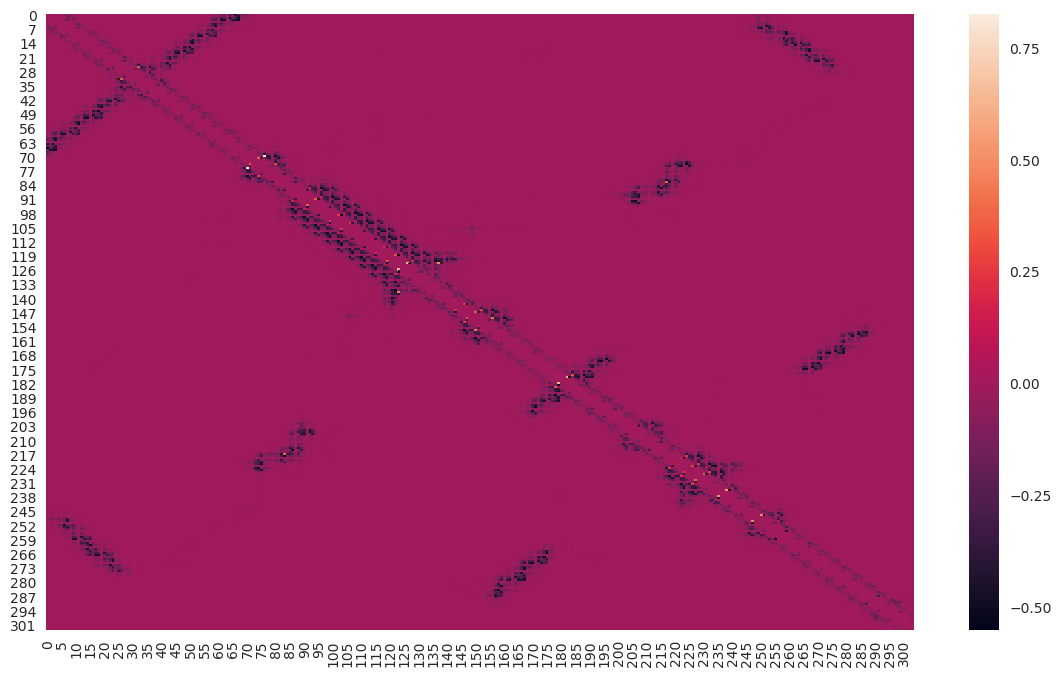

In [12]:
seaborn.heatmap(score_graph.lj.detach())

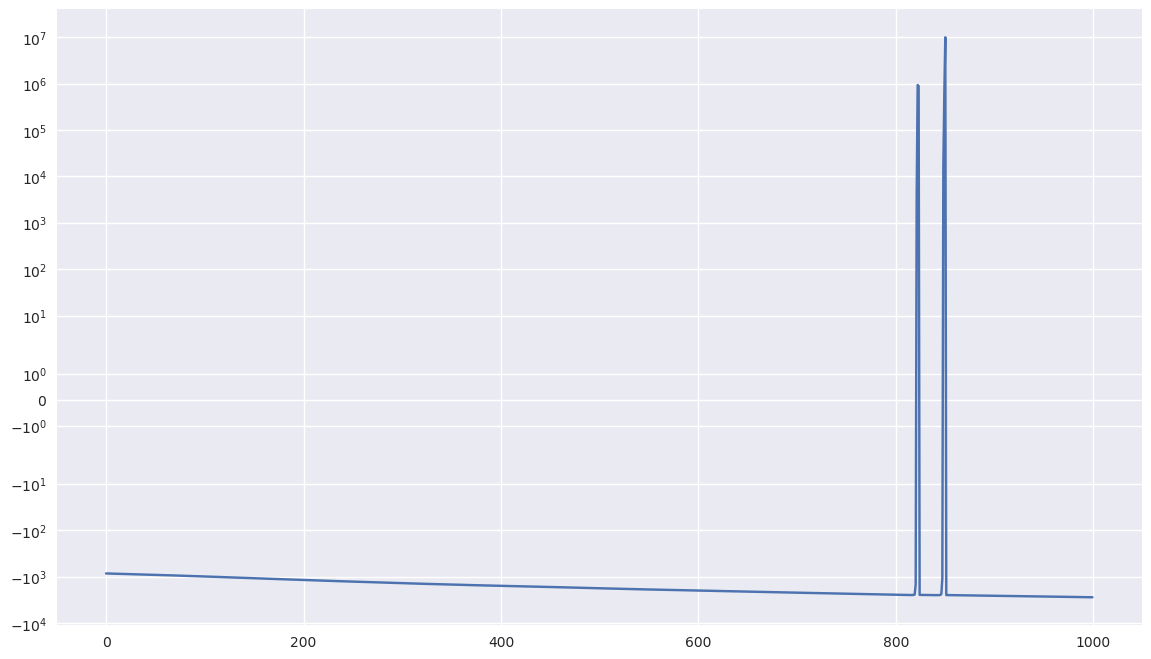

In [13]:
from IPython.display import clear_output

trace = []

optimizer = torch.optim.Adadelta((score_graph.coords,), lr=.3)

def step():
    optimizer.zero_grad()
    
    total_score = score_graph.step()
    
    trace.append(total_score.detach().numpy())
    return total_score

for i in range(10):
    for _ in range(100):
        optimizer.step(step)
        
    
    viewer.update()

pyplot.figure()
pyplot.plot(trace)
pyplot.yscale("symlog")

pyplot.show()